<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter02/Sequential_method_to_build_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    def __len__(self): 
        return len(self.x)

In [ ]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [ ]:
%pip install torch_summary
from torchsummary import summary

You should consider upgrading via the '/home/yyr/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
summary(model, torch.zeros(1,2));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


In [ ]:
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

0.0754392147064209


In [ ]:
val = [[8,9],[10,11],[1.5,2.5]]
val = torch.tensor(val).float()

In [ ]:
model(val.to(device))

tensor([[16.7953],
        [20.6512],
        [ 4.2647]], device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
val.sum(-1)

tensor([17., 21.,  4.])

## My implementation

In [1]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [16]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
class MyDataset(Dataset):

    def __init__(self, x, y):
        
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()

    def __getitem__(self, ix):
        return self.x[ix], self.y[ix] 

    def __len__(self):
        return len(self.x)

In [35]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [5]:
model = nn.Sequential(
                        nn.Linear(2, 8),
                        nn.ReLU(),
                        nn.Linear(8, 1)
                     ).to(device)

In [14]:
model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [6]:
#%pip install torch_summary
from torchsummary import summary

In [15]:
summary(model, torch.zeros(1,2));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


In [17]:
loss = nn.MSELoss()
opt = SGD(model.parameters(), lr = 0.001)

In [40]:
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

0.05411505699157715


In [38]:
loss_history = []
for _ in range(50):
    for ix, iy in dl:
        ix, iy = ix.to(device), iy.to(device)
        opt.zero_grad()
        y_pred = model(ix)
        loss_value = loss(y_pred, iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())

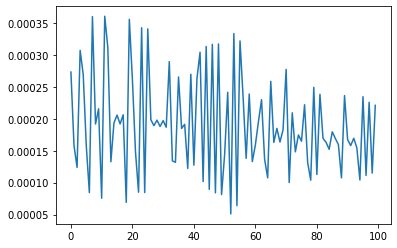

In [41]:
plt.plot(loss_history)